In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

adDf = pd.read_csv('Advertising Budget and Sales.csv')

sales = adDf['Sales ($)']
TVbud = adDf['TV Ad Budget ($)']
radBud = adDf['Radio Ad Budget ($)']
newsBud = adDf['Newspaper Ad Budget ($)']

adDf


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
import time
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

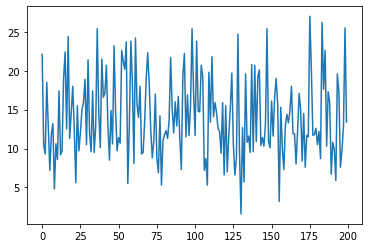

In [3]:
# sales plot
sales = adDf['Sales ($)']

plt.plot(sales)

Text(0, 0.5, 'TV Ad Budget (USD)')

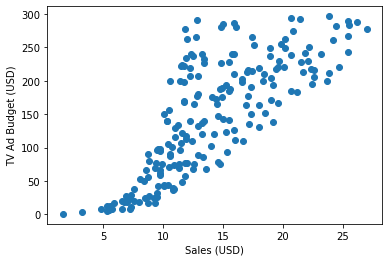

In [4]:
# TV ad budget vs sales

plt.scatter(sales, TVbud)
plt.xlabel('Sales (USD)')
plt.ylabel('TV Ad Budget (USD)')


Text(0, 0.5, 'Radio Ad Budget (USD)')

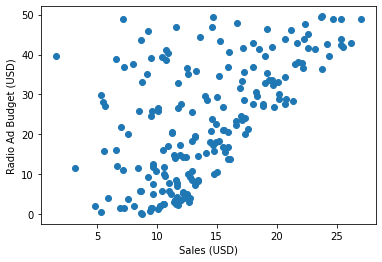

In [5]:
plt.scatter(sales, radBud)
plt.xlabel('Sales (USD)')
plt.ylabel('Radio Ad Budget (USD)')

Text(0, 0.5, 'Newspaper Ad Budget (USD)')

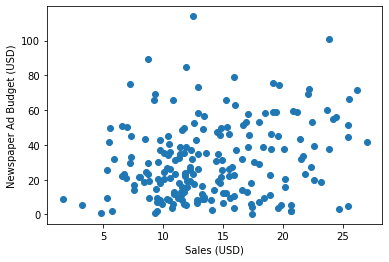

In [6]:
plt.scatter(sales, newsBud)
plt.xlabel('Sales (USD)')
plt.ylabel('Newspaper Ad Budget (USD)')


Text(0, 0.5, 'sales')

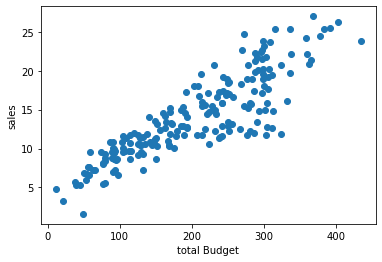

In [7]:
plt.scatter( newsBud+TVbud+radBud,sales)
plt.xlabel('total Budget')
plt.ylabel('sales')

In [8]:
print('data analysis')

data analysis


Text(0.5, 0, 'Newspaper Ad Budget (USD)')

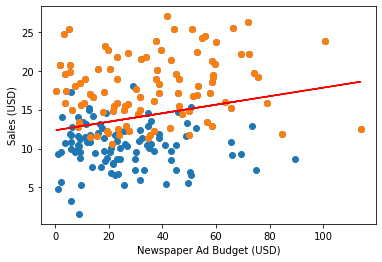

In [9]:
import numpy as np
N = 10000
xr = newsBud
yr = sales
x = np.concatenate((xr[0:100],xr[100:]))
y = np.concatenate((yr[0:100],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.scatter(newsBud,sales)
plt.scatter(newsBud[newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]],sales[newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]])
plt.ylabel('Sales (USD)')
plt.xlabel('Newspaper Ad Budget (USD)')


In [10]:
highpp = newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]
lowpp =newsBud+TVbud+radBud <= np.sort(newsBud+TVbud+radBud)[100]

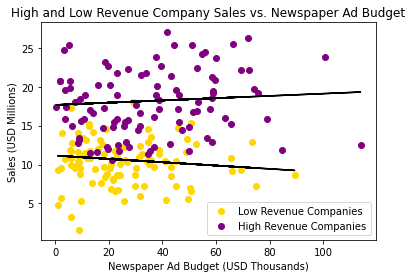

In [48]:
plt.scatter(newsBud[lowpp],sales[lowpp], label = "Low Revenue Companies", color = "gold")
xr = newsBud[lowpp]
yr = sales[lowpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-",color = "black")
newsmin = p[1]
newsim = p[0]
plt.scatter(newsBud[highpp],sales[highpp],  label = "High Revenue Companies",color = "purple")
xr = newsBud[highpp]
yr = sales[highpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))
plt.legend()
plt.ylabel('Sales (USD Millions)')
plt.xlabel('Newspaper Ad Budget (USD Thousands)')
plt.title('High and Low Revenue Company Sales vs. Newspaper Ad Budget')


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-",color = "black")
newsmax = p[1]
newsi = p[0]

NameError: name 'xx' is not defined

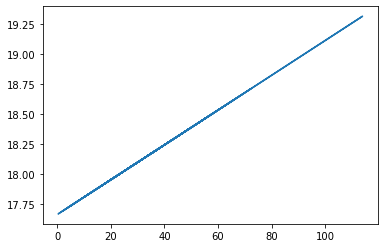

In [12]:
plt.plot(x,p(x))
y = p[0]+p[1]*xx
plt.plot(xx,y)
xx = np.arange(0,100,1)
print(newsmin)
print(newsmax)
print('p[1] is the slope and p[0] is y intercept of average line')

0.05456129249488672
0.2446914049314321


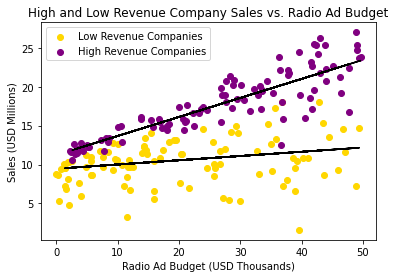

In [66]:
plt.scatter(radBud[lowpp],sales[lowpp],label = "Low Revenue Companies", color = "gold")
xr = radBud[lowpp]
yr = sales[lowpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", color = "black")
radmin = p[1]
radim = p[0]
plt.scatter(radBud[highpp],sales[highpp],label = "High Revenue Companies", color = "purple")
xr = radBud[highpp]
yr = sales[highpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))
plt.legend()
plt.ylabel('Sales (USD Millions)')
plt.xlabel('Radio Ad Budget (USD Thousands)')
plt.title('High and Low Revenue Company Sales vs. Radio Ad Budget')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", color = "black")
radmax = p[1]
radi = p[0]
print(radmin)
print(radmax)

[  5.4   7.3   8.6   8.7  13.2  16.9  17.2  23.8  25.   25.1  26.8  27.5
  28.6  31.5  43.1  44.5  53.5  57.5  62.3  66.1  66.9  68.4  69.   69.2
  70.6  74.7  75.3  76.3  76.4  88.3  89.7  95.7  97.2  97.5 100.4 102.7
 107.4 109.8 112.9 116.  120.2 120.5 129.4 131.1 134.3 136.2 139.3 142.9
 147.3 177.  197.6]
0.09562214238039798
0.029530872780229454


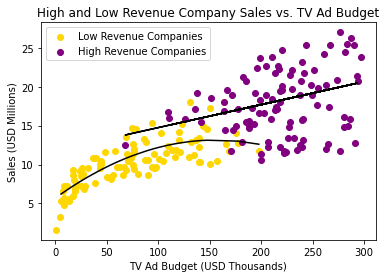

In [65]:
plt.scatter(TVbud[lowpp],sales[lowpp],label = "Low Revenue Companies",color = "gold")
xr = TVbud[lowpp]
yr = sales[lowpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))


z = np.polyfit(x, y, 2)
p = np.poly1d(z)
plt.plot(np.sort(x),p(np.sort(x)),"r-",color = "black")

print(np.sort(x))
tvmin = p[1]
tvim = p[0]
plt.scatter(TVbud[highpp],sales[highpp],label = "High Revenue Companies",color = "purple")
xr = TVbud[highpp]
yr = sales[highpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))
plt.legend()
plt.ylabel('Sales (USD Millions)')
plt.xlabel('TV Ad Budget (USD Thousands)')
plt.title('High and Low Revenue Company Sales vs. TV Ad Budget')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-",color = "black")
tvmax = p[1]
tvi = p[0]
print(tvmin)
print(tvmax)

In [15]:
print('volatility is a way to measure how off the price is from the expected a volitility of 100 means it is 100 percent more or less than expected')

volatility is a way to measure how off the price is from the expected a volitility of 100 means it is 100 percent more or less than expected


In [16]:
tvminvolatility = abs((tvmin*TVbud[lowpp] +tvim-sales[lowpp])/sales[lowpp])
tvmaxvolatility = abs((tvmax*TVbud[highpp] +tvi-sales[highpp])/sales[highpp])

radminvolatility = abs((radmin*radBud[lowpp] +radim-sales[lowpp])/sales[lowpp])
radminvolatility = radminvolatility[radminvolatility <= 100]
radmaxvolatility = abs((radmax*radBud[highpp] +radi-sales[highpp])/sales[highpp])

newsminvolatility = abs((newsmin*newsBud[lowpp] +newsim-sales[lowpp])/sales[lowpp])
newsmaxvolatility = abs((newsmax*newsBud[highpp] +newsi-sales[highpp])/sales[highpp])
radminvolatility.sum()

31.45980925822288

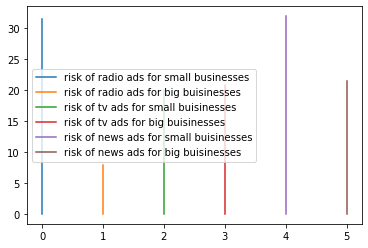

In [17]:
plt.plot([0,0],[0,radminvolatility.sum()], label = 'risk of radio ads for small businesses')
plt.plot([1,1],[0,radmaxvolatility.sum()], label = 'risk of radio ads for big buisinesses')
plt.plot([2,2],[0,tvminvolatility.sum()], label = 'risk of tv ads for small buisinesses')
plt.plot([3,3],[0,tvmaxvolatility.sum()], label = 'risk of tv ads for big buisinesses')
plt.plot([4,4],[0,newsminvolatility.sum()], label = 'risk of news ads for small buisinesses')
plt.plot([5,5],[0,newsmaxvolatility.sum()], label = 'risk of news ads for big buisinesses')
plt.legend()

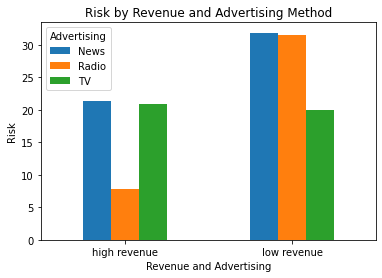

In [27]:

import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame with revenue and advertising data
data = pd.DataFrame({
    'Revenue': ['low revenue', 'high revenue', 'low revenue', 'high revenue', 'low revenue', 'high revenue', ],
    'Advertising': ['Radio', 'Radio','TV', 'TV', 'News', 'News'],
    'sales': [radminvolatility.sum(), radmaxvolatility.sum(), tvminvolatility.sum(), tvmaxvolatility.sum(), 
              newsminvolatility.sum(), newsmaxvolatility.sum()]
})

# Reshape the data using groupby() and pivot()
data_pivot = data.groupby(['Revenue', 'Advertising'])['sales'].sum().reset_index().pivot(index='Revenue', columns='Advertising', values='sales')

# Create a bar plot with multi-level labels
ax = data_pivot.plot(kind='bar')

# Set the title and labels for the graph
plt.title('Risk by Revenue and Advertising Method')
plt.xlabel('Revenue and Advertising')
plt.ylabel('Risk')
plt.xticks(rotation = 0)
# Display the graph
plt.show()


In [26]:
TVbud[lowpp]

1       44.5
2       17.2
5        8.7
6       57.5
7      120.2
       ...  
192     17.2
194    149.7
195     38.2
196     94.2
197    177.0
Name: TV Ad Budget ($), Length: 101, dtype: float64

NameError: name 'TVmaxvolatility' is not defined

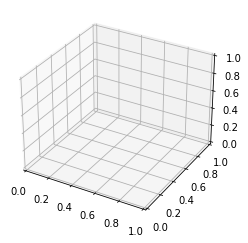

In [27]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis

 
# plotting
ax.scatter3D(sales[highpp],TVbud[highpp],TVmaxvolatility , 'green')
ax.plot3D(tvmax*np.arange(100,300,1) +tvi,np.arange(100,300,1),0)
ax.set_title('percent increase on 3d graph for rich tv buisinesses')
plt.show()




ax.set_xlabel(r'$k_x[\mu m^{-1}]$')
ax.set_ylabel(r'$k_y[\mu m^{-1}]$')
ax.set_zlabel(r'$\epsilon-\omega_X[\gamma_p]$')
ax.set_zlabel('percent increase from expected',labelpad = 30)

In [28]:
#machine learning

SyntaxError: invalid syntax (<ipython-input-28-6ba2dd2f3e99>, line 1)

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
x = np.array(TVbud)
y = np.array(sales)

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)
print(lr.predict([[2.4]]))
print('predicts based on value and sklearn')

[7.14668149]
predicts based on value and sklearn


In [30]:
ignore the rest it is garbage

SyntaxError: invalid syntax (<ipython-input-30-3057afe249fc>, line 1)

In [31]:
train_vectors,test_vectors,train_labels,test_labels = sklearn.model_selection.train_test_split(TVbud,sales, train_size=.70, random_state=None, shuffle=True)

In [32]:
rerun_training = True
filename = 'full_face_model.p'
filename

'full_face_model.p'

In [33]:
tmp_vectors = train_vectors
tmp_labels = train_labels

In [34]:
start = time.time()
if rerun_training:
    
    print("Fitting the classifier to the training set")
    param_grid = {'C': [10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0],
                  'gamma': [0.0005, 0.001, 0.005, 0.01]}
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, n_jobs= -1)
    clf = clf.fit(tmp_vectors, tmp_labels)
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

    #save the model to a file
    pickle.dump(clf, open(filename, 'wb'))

else:
    #read the model from a file
    print("reading pickle file.")
    clf = pickle.load(open(filename, 'rb'))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)
    
end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[137.9 149.7 228.    5.4 255.4 253.8  90.4   0.7  57.5  13.1 177.  265.2
 222.4  75.5  28.6  75.1 290.7 202.5 265.6  13.2 109.8  17.2 187.8  23.8
 261.3 237.4 214.7 182.6  38.2 166.8  25.6 219.8  80.2  25.1  25.  195.4
 117.2 296.4 229.5  31.5 287.6   8.4 100.4 293.6 123.1 220.3  69.  102.7
 266.9 218.5  87.2 218.4  76.4  62.3 276.9  16.9 165.6 170.2 139.2 210.8
 224.   44.5  56.2 191.1  70.6  78.2 171.3 199.1  69.2 239.9 225.8 134.3
 168.4  18.7 163.3 112.9   4.1 110.7 136.2 230.1 204.1 149.8 209.6 213.5
 199.8  76.4  27.5  94.2  75.3 243.2   7.3 289.7 109.8 139.5 232.1  43.1
  68.4  93.9 131.7 280.2 227.2  76.3 220.5  43.  125.7 139.3  19.6 262.7
 172.5  44.7 222.4  11.7 228.3  74.7 210.7   7.8  48.3 205.  121.  197.6
 175.1   8.6  17.2 129.4 262.9 213.4 239.3  26.8  85.7 184.9 164.5 188.4
 131.1  53.5  88.3 234.5 180.8 177.  240.1 276.7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
x = np.random.random(13876)

km = KMeans()

km.fit(x.reshape(-1,1))  # -1 will be calculated to be 13876 here

In [67]:
def get_jenks_breaks(data_list, number_class):
    data_list.sort()
    mat1 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat1.append(temp)
    mat2 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat2.append(temp)
    for i in range(1, number_class + 1):
        mat1[1][i] = 1
        mat2[1][i] = 0
        for j in range(2, len(data_list) + 1):
            mat2[j][i] = float('inf')
    v = 0.0
    for l in range(2, len(data_list) + 1):
        s1 = 0.0
        s2 = 0.0
        w = 0.0
        for m in range(1, l + 1):
            i3 = l - m + 1
            val = float(data_list[i3 - 1])
            s2 += val * val
            s1 += val
            w += 1
            v = s2 - (s1 * s1) / w
            i4 = i3 - 1
            if i4 != 0:
                for j in range(2, number_class + 1):
                    if mat2[l][j] >= (v + mat2[i4][j - 1]):
                        mat1[l][j] = i3
                        mat2[l][j] = v + mat2[i4][j - 1]
        mat1[l][1] = 1
        mat2[l][1] = v
    k = len(data_list)
    kclass = []
    for i in range(number_class + 1):
        kclass.append(min(data_list))
    kclass[number_class] = float(data_list[len(data_list) - 1])
    count_num = number_class
    while count_num >= 2:  # print "rank = " + str(mat1[k][count_num])
        idx = int((mat1[k][count_num]) - 2)
        # print "val = " + str(data_list[idx])
        kclass[count_num - 1] = data_list[idx]
        k = int((mat1[k][count_num] - 1))
        count_num -= 1
    return kclass

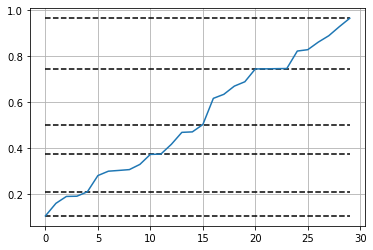

In [68]:
import numpy as np
import matplotlib.pyplot as plt



x = np.random.random(30)

breaks = get_jenks_breaks(x, 5)

for line in breaks:
    plt.plot([line for _ in range(len(x))], 'k--')

plt.plot(x)
plt.grid(True)
plt.show()

In [ ]:
breaks = get_jenks_breaks(x, 5)

for line in breaks:
    plt.plot([line for _ in range(len(x))], 'k--')

plt.plot(x)
plt.grid(True)
plt.show()

In [36]:
breaks = get_jenks_breaks(test_vectors,test_labels)

AttributeError: 'Series' object has no attribute 'sort'

Regression Machine Learning

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [73]:
X_train, X_test, y_train, y_test = train_test_split(adDf[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']], sales, test_size=0.2, random_state=42)


In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
accuracy = model.score(X_test, y_test)
print('Model accuracy:', accuracy)

Model accuracy: 0.899438024100912


In [77]:
print(model.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [78]:
import statsmodels.api as sm



# Create the input matrix X and the output vector y
X = adDf[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = sales

# Add a constant term to the input matrix X
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print a summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Sales ($)   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.58e-96
Time:                        11:57:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     